In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns # imports seaborn class as an alias 'sns'; 
from sklearn.decomposition import PCA # imports the PCA class, allowing us to reduce the dimensionality of our data
from sklearn.preprocessing import RobustScaler

In [16]:
# Importing datasets into Jupyter Notebook
train = pd.read_csv('./data/train_timeseries/train_timeseries.csv')
test = pd.read_csv('./data/test_timeseries/test_timeseries.csv')
val = pd.read_csv('./data/validation_timeseries/validation_timeseries.csv')

In [17]:
train.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [18]:
# Reduce the number of samples to a certain area of the US
train = train[train['fips'] < 1500]
test = test[test['fips'] < 1500]
val = val[val['fips'] < 1500]

print(train.shape)

(416070, 21)


In [19]:
# Formatting scores into own dataframes
train_y = train['score'] + 1
train_y.fillna(0,inplace=True)

test_y = test['score'] + 1
test_y.fillna(0,inplace=True)

val_y = val['score'] + 1
val_y.fillna(0,inplace=True)

print('The output shapes are',train_y.shape,test_y.shape,val_y.shape)

The output shapes are (416070,) (48977,) (48910,)


In [20]:
# Extracting input features from entire dataframe
train_x = train.drop(['date','score'],axis = 1)
test_x = test.drop(['date','score'],axis = 1)
val_x = val.drop(['date','score'],axis = 1)

print('The input shapes are',train_x.shape,test_x.shape,val_x.shape)


The input shapes are (416070, 19) (48977, 19) (48910, 19)


In [21]:
# Normalize the features with train_x and save transform into 'scaler'
scaler = RobustScaler().fit(train_x)

# Apply transformation to each input matrix
# Transform returns a numpy array
train_x_norm = scaler.transform(train_x)
test_x_norm = scaler.transform(test_x)
val_x_norm = scaler.transform(val_x)

print(train_x_norm.shape)

(416070, 19)


In [22]:
# calling PCA with 2 features
pca = PCA(n_components=2)

# Reducing each input matrix
train_x_pca = pca.fit_transform(train_x_norm)
test_x_pca = pca.fit_transform(test_x_norm)
val_x_pca = pca.fit_transform(val_x_norm)

print(train_x_pca.shape,test_x_pca.shape,val_x_pca.shape)

(416070, 2) (48977, 2) (48910, 2)


# Plotting matrices with Seaborn

In [34]:
df = pd.DataFrame(np.insert(train_x_pca, 2, train_y, axis=1), columns=['feat_1', 'feat_2', 'score'])

In [35]:
df.head()

,feat_1,feat_2,score
0,-0.644599,-0.718400,0.0
1,-0.379944,-0.983237,0.0
2,2.361903,-2.852521,0.0
3,5.162569,-2.419474,2.0
4,-1.431306,-1.302214,0.0


<AxesSubplot:xlabel='feat_1', ylabel='feat_2'>

C:\Users\brenn\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


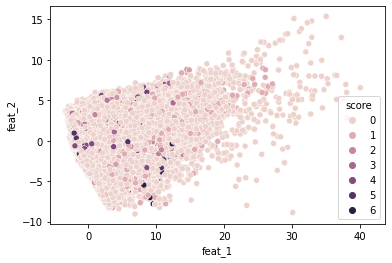

In [39]:
# Plotting 
sns.scatterplot(data=df, x='feat_1', y='feat_2', hue='score')

# Training and Predicting w/ SGD Regressor

In [24]:
# Import SGD Regressor model
from sklearn.linear_model import SGDRegressor # imports SGDRegressor class

In [25]:
sgdr = SGDRegressor()

In [26]:
# train_x_pca = pca.fit_transform(train_x_norm)
# test_x_pca = pca.fit_transform(test_x_norm)
# val_x_pca = pca.fit_transform(val_x_norm)

In [27]:
sgdr.fit(train_x_pca,train_y)

SGDRegressor()

In [28]:
# Returns the R^2 score
sgdr.score(test_x_pca,test_y)

-0.042920368203125614